In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AR

In [2]:
data=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\daily-total-female-births-CA.csv')

In [3]:
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
data['date'].dtype

dtype('O')

In [5]:
data=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\daily-total-female-births-CA.csv',parse_dates=[0])

In [6]:
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
data['date'].dtype

dtype('<M8[ns]')

## Loading data as a series

In [21]:
series=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\daily-total-female-births-CA.csv',parse_dates=[0]
                , index_col=0, squeeze=True)

In [22]:
series

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, Length: 365, dtype: int64

## Exploring Time Series Data

In [23]:
series.shape

(365,)

In [24]:
data.shape

(365, 2)

In [25]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [26]:
data[(data['date']>='1959-01-01')&(data['date']<='1959-01-21')]

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


In [27]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [28]:
data.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


## Feature Engineering

In [29]:
features=data.copy()

In [30]:
features.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [31]:
features['year']=data['date'].dt.year

In [32]:
features['Month']=data['date'].dt.month

In [33]:
features['Day']=data['date'].dt.day

In [34]:
features.head()

,date,births,year,Month,Day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


### Creating Lags

In [35]:
features['lag1']=data['births'].shift(1)

In [36]:
features.head()

,date,births,year,Month,Day,lag1
0,1959-01-01,35,1959,1,1,NaN
1,1959-01-02,32,1959,1,2,35.0
2,1959-01-03,30,1959,1,3,32.0
3,1959-01-04,31,1959,1,4,30.0
4,1959-01-05,44,1959,1,5,31.0


In [37]:
features['lag2']=data['births'].shift(2)

In [38]:
features.head()

,date,births,year,Month,Day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,35.0
3,1959-01-04,31,1959,1,4,30.0,32.0
4,1959-01-05,44,1959,1,5,31.0,30.0


### Window Features

In [39]:
features['Roll_mean']=data['births'].rolling(window=2).mean()

In [41]:
features.head()

,date,births,year,Month,Day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,35.0,31.0
3,1959-01-04,31,1959,1,4,30.0,32.0,30.5
4,1959-01-05,44,1959,1,5,31.0,30.0,37.5


In [43]:
features['Roll_max']=data['births'].rolling(window=3).max()

In [44]:
features.head()

,date,births,year,Month,Day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,35.0,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,32.0,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,30.0,37.5,44.0


### Expanding Features

In [45]:
features['Expand_max']=data['births'].expanding().max()

In [46]:
features.head()

,date,births,year,Month,Day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,35.0,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,32.0,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,30.0,37.5,44.0,44.0


## Visualization

In [48]:
datav=data.copy()

In [49]:
datav.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


<AxesSubplot:>

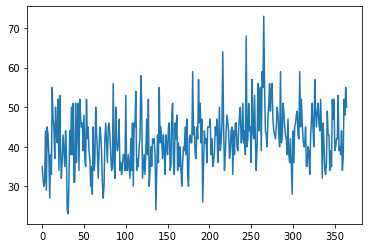

In [52]:
datav['births'].plot()

In [53]:
datav.index=datav['date']

In [61]:
datav.head(10)

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38


<AxesSubplot:xlabel='date'>

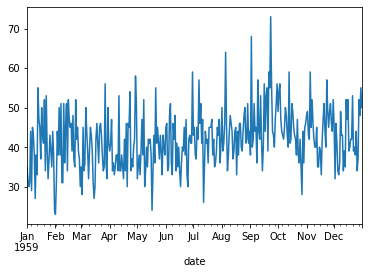

In [56]:
datav['births'].plot()

In [62]:
datav2=datav[(datav['date']>'1959-01-01')&(datav['date']<='1959-01-10')].copy()

In [63]:
datav2.head()

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29


<AxesSubplot:xlabel='date'>

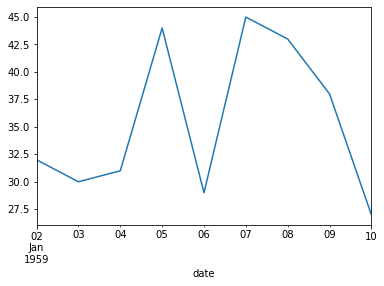

In [64]:
datav2['births'].plot()

### Trendline

In [65]:
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


<AxesSubplot:ylabel='births'>

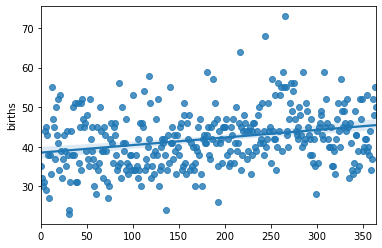

In [66]:
sns.regplot(x=data.index.values, y=data['births'])

<AxesSubplot:ylabel='births'>

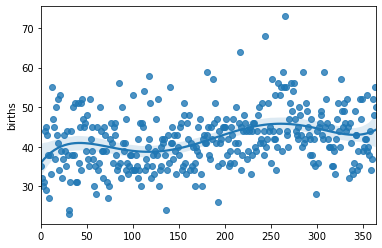

In [68]:
sns.regplot(x=data.index.values, y=data['births'], order=5)

In [76]:
miles=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\us-airlines-monthly-aircraft-miles-flown.csv',parse_dates=[0])

In [77]:
miles.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<AxesSubplot:>

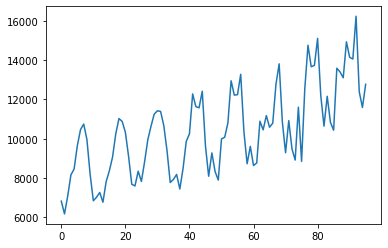

In [79]:
miles['MilesMM'].plot()

<AxesSubplot:ylabel='MilesMM'>

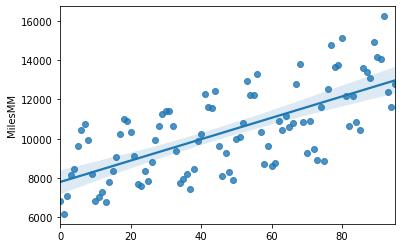

In [80]:
sns.regplot(x=miles.index.values, y=miles['MilesMM'])

### Removing Seasonality

In [81]:
miles.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [82]:
miles['Year']=miles['Month'].dt.year

In [83]:
miles.head()

,Month,MilesMM,Year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [86]:
miles.groupby('Year')['MilesMM'].mean()

Year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='Year'>

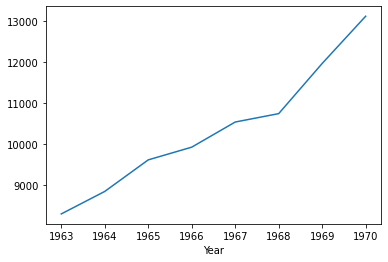

In [87]:
miles.groupby('Year')['MilesMM'].mean().plot()

### Creating  Lags

In [88]:
miles['Lag1']=miles['MilesMM'].shift(1)

In [89]:
miles.head()

,Month,MilesMM,Year,Lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='Lag1', ylabel='MilesMM'>

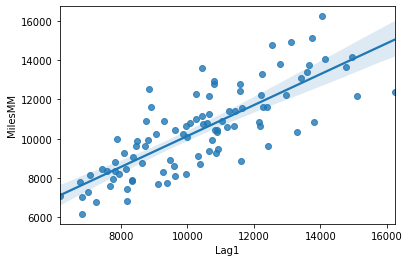

In [90]:
sns.regplot(x=miles['Lag1'], y=miles['MilesMM'])

### From pandas plotting lag plot

- from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

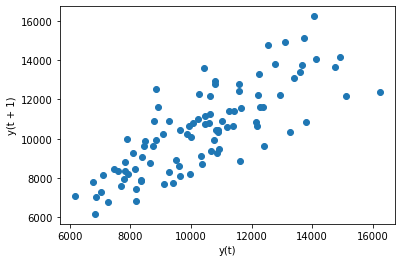

In [96]:
lag_plot(miles['MilesMM'],lag=1)

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

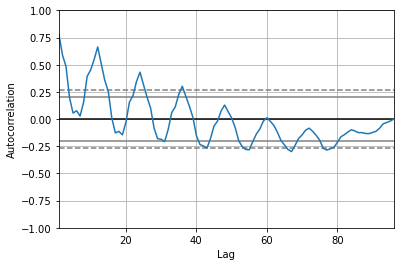

In [98]:
autocorrelation_plot(miles['MilesMM'])

## Downsampling and Upsampling

###  Downsampling

In [100]:
milesdf=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\us-airlines-monthly-aircraft-miles-flown.csv',parse_dates=[0])

In [101]:
milesdf.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [106]:
quarter_miles=milesdf.resample('Q', on='Month').mean()

In [107]:
quarter_miles.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [112]:
year_miles=milesdf.resample('A', on='Month').sum()

In [113]:
year_miles.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


### Upsampling

In [114]:
upsample_miles=milesdf.resample('D', on='Month').mean()

In [115]:
upsample_miles.head()

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN


In [116]:
milesdf.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [122]:
inter_miles=upsample_miles.interpolate(method='linear')

In [123]:
inter_miles.head()

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065


In [124]:
polyinter_miles=upsample_miles.interpolate(method='polynomial', order=2
                                          )

In [125]:
polyinter_miles.head()

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6775.360206
1963-01-03,6725.767366
1963-01-04,6678.221480
1963-01-05,6632.722548


## Decomposing Time Series

In [126]:
#from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
miles_deco=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\us-airlines-monthly-aircraft-miles-flown.csv',parse_dates=[0])

In [9]:
miles_deco.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [10]:
miles_deco.index=miles_deco['Month']

In [11]:
miles_deco.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


In [12]:
result=seasonal_decompose(miles_deco['MilesMM'], model='additive')

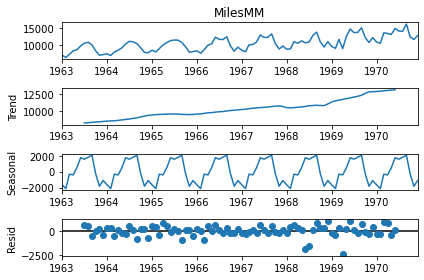

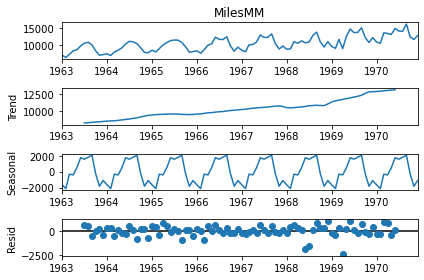

In [13]:
result.plot()

In [134]:
result1=seasonal_decompose(miles_deco['MilesMM'], model='Multiplicative')

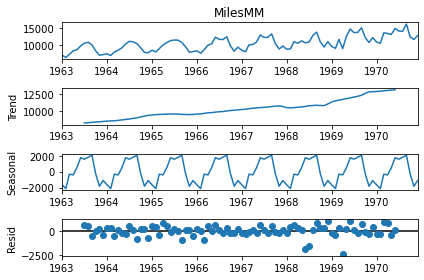

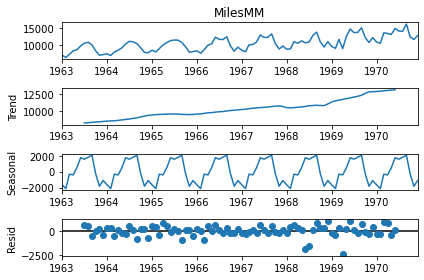

In [135]:
result1.plot()

## Differencing

In [14]:
miles_df=miles_deco=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\us-airlines-monthly-aircraft-miles-flown.csv',parse_dates=[0])

In [15]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [16]:
miles_df['Lag 1']=miles_df['MilesMM'].shift(1)

In [17]:
miles_df.head()

,Month,MilesMM,Lag 1
0,1963-01-01,6827,NaN
1,1963-02-01,6178,6827.0
2,1963-03-01,7084,6178.0
3,1963-04-01,8162,7084.0
4,1963-05-01,8462,8162.0


In [18]:
miles_df['MilesMM_dif_1']=miles_df['MilesMM'].diff(periods=1)

In [19]:
miles_df.head()

,Month,MilesMM,Lag 1,MilesMM_dif_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


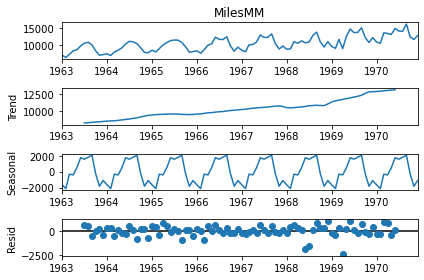

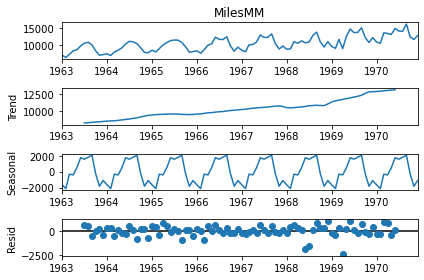

In [9]:
miles_df.index=miles_df['Month']
result_a=seasonal_decompose(miles_df['MilesMM'], model='Additive')
result_a.plot()

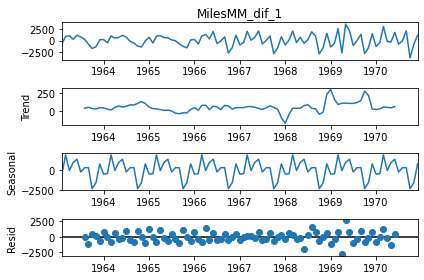

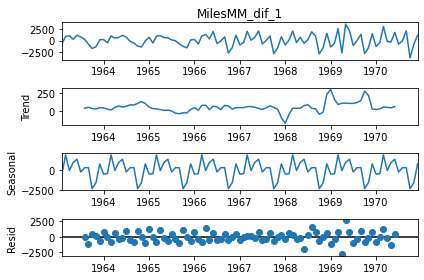

In [10]:
miles_df.index=miles_df['Month']
result_b=seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()

<AxesSubplot:xlabel='Month'>

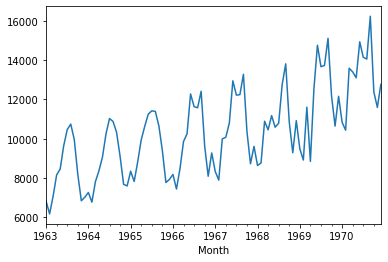

In [11]:
miles_df['MilesMM'].plot()

<AxesSubplot:xlabel='Month'>

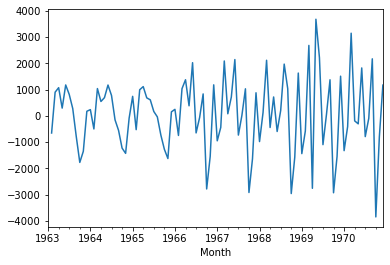

In [12]:
miles_df['MilesMM_dif_1'].plot()

In [13]:
miles_df['MilesMM_dif_12']=miles_df['MilesMM_dif_1'].diff(periods=12)

In [14]:
miles_df.head(20)

,Month,MilesMM,Lag 1,MilesMM_dif_1,MilesMM_dif_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


<AxesSubplot:xlabel='Month'>

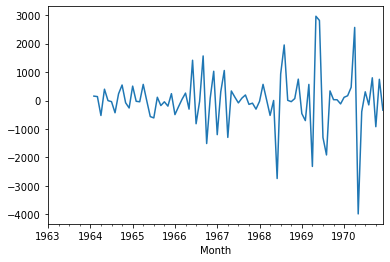

In [161]:
miles_df['MilesMM_dif_12'].plot()

In [162]:
result_c=seasonal_decompose(miles_df.iloc[13:,4], model='additive')

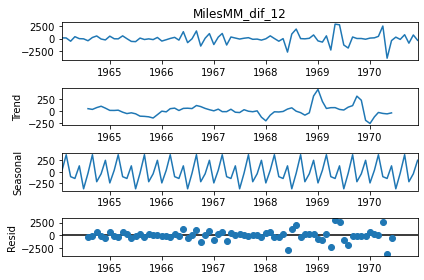

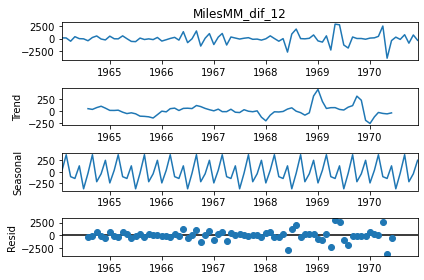

In [163]:
result_c.plot()

In [166]:
miles_df.head()

,Month,MilesMM,Lag 1,MilesMM_dif_1,MilesMM_dif_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN


## Train Test Split

In [172]:
temp=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\daily-min-temperatures.csv',parse_dates=[0])

In [173]:
temp.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [175]:
temp['Date'].dtype

dtype('<M8[ns]')

In [176]:
temp.shape

(3650, 2)

In [177]:
temp.shape[0]

3650

In [178]:
type(temp.shape[0])

int

In [185]:
train_size=int(temp.shape[0]*0.8)

In [186]:
train_size

2920

In [187]:
train=temp[:train_size]
test=temp[train_size:]

In [188]:
train.shape

(2920, 2)

In [189]:
test.shape

(730, 2)

## Persistence Model

In [190]:
temp1=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\daily-min-temperatures.csv',parse_dates=[0])

In [191]:
temp1.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [192]:
temp['Date'].dtype

dtype('<M8[ns]')

In [193]:
temp['t']=temp['Temp'].shift(1)

In [194]:
train,test=temp[1:temp.shape[0]-7],temp[temp.shape[0]-7:]

In [195]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [196]:
test.head()

,Date,Temp,t
3643,1990-12-25,12.9,10.0
3644,1990-12-26,14.6,12.9
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6


In [198]:
x_train,y_train=train['t'],train['Temp']
x_test,y_test=test['t'],test['Temp']

In [199]:
predictions=x_test.copy()

In [200]:
print(predictions)
print(y_test)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [202]:
mean_squared_error(y_test, predictions)

3.4228571428571413

In [ ]:
#This is random walk model
#How we identify a random walk is, first calculate the mse for random walk model
#Then calculate mse for different ARIMA, SARIMA models
# If mse of other models are below than mse of random walk, then the model is one of the other model
#If the mse of other models are greater than the mse of Randoma Walk,then the model is random walk.

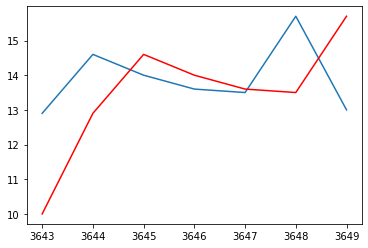

In [204]:
plt.plot(y_test)
plt.plot(predictions, color='red')

## Autoregression Model

In [30]:
#Only works without seasonality pr trend

In [6]:
temp2=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\daily-min-temperatures.csv',parse_dates=[0])

In [7]:
temp2.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [8]:
train,test=temp2.Temp[1:temp2.shape[0]-7],temp2.Temp[temp2.shape[0]-7:]

In [9]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [10]:
#from statsmodels.tsa.ar_model import AR

In [11]:
model=AR(train)

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [12]:
model_fit=model.fit()

#### Number of Lags

In [13]:
model_fit.k_ar

29

In [14]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [19]:
predictions=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [20]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [21]:
predictions.iloc[0]

11.871274847727847

In [231]:
mean_squared_error(y_test,predictions)

1.5015252310069156

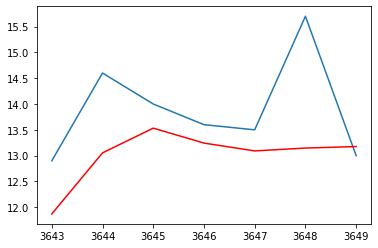

In [232]:
plt.plot(y_test)
plt.plot(predictions, color='red')

## Walk Forward

In [240]:
temp3=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\daily-min-temperatures.csv',parse_dates=[0])

In [241]:
train,test=temp3.Temp[1:temp2.shape[0]-7],temp3.Temp[temp2.shape[0]-7:]

In [242]:
data=train
predict=[]
for t in test:
    model=AR(data)
    model_fit=model.fit()
    y=model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data=np.append(data,t)
    data=pd.Series(data)

11.871274847727847
11.879486961395067
11.88075796714347
11.880047281370942
11.880279179041251
11.880175037389524
11.878847169255268


C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [243]:
data

0       17.9
1       18.8
2       14.6
3       15.8
4       15.8
        ... 
3644    14.0
3645    13.6
3646    13.5
3647    15.7
3648    13.0
Length: 3649, dtype: float64

In [244]:
mean_squared_error(test.values,predict)

4.911490390428358

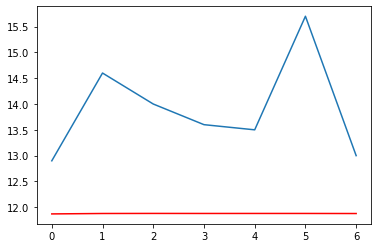

In [245]:
plt.plot(test.values)
plt.plot(predict, color='Red')

## Moving Average Model

In [31]:
#Only works without trend or seasonality

In [23]:
df=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\daily-min-temperatures.csv',parse_dates=[0])

In [24]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


<AxesSubplot:>

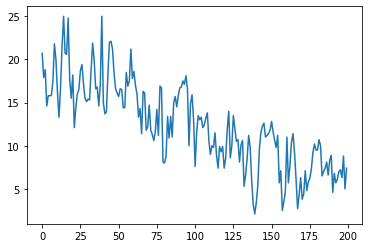

In [29]:
df['Temp'][:200].plot()

In [248]:
df['t']=df['Temp'].shift(1)

In [249]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [250]:
df['Resid']=df['Temp']-df['t']

In [251]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [252]:
train,test=df.Resid[1:df.shape[0]-7],df.Resid[df.shape[0]-7:]

In [253]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [255]:
test.head()

3643    2.9
3644    1.7
3645   -0.6
3646   -0.4
3647   -0.1
3648    2.2
3649   -2.7
Name: Resid, dtype: float64

In [256]:
model=AR(train)

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [257]:
modelfit=model.fit()

In [258]:
modelfit.k_ar

29

In [259]:
modelfit.params

const       -0.006415
L1.Resid    -0.407139
L2.Resid    -0.496194
L3.Resid    -0.445747
L4.Resid    -0.403706
L5.Resid    -0.362528
L6.Resid    -0.334810
L7.Resid    -0.288468
L8.Resid    -0.274281
L9.Resid    -0.235333
L10.Resid   -0.234799
L11.Resid   -0.228532
L12.Resid   -0.208608
L13.Resid   -0.180324
L14.Resid   -0.178425
L15.Resid   -0.152265
L16.Resid   -0.143617
L17.Resid   -0.132501
L18.Resid   -0.097075
L19.Resid   -0.104927
L20.Resid   -0.079371
L21.Resid   -0.059348
L22.Resid   -0.045921
L23.Resid   -0.063197
L24.Resid   -0.063441
L25.Resid   -0.045061
L26.Resid   -0.023578
L27.Resid   -0.011882
L28.Resid   -0.003789
L29.Resid   -0.003422
dtype: float64

In [260]:
pred_resid=modelfit.predict(start=len(train), end=len(train)+len(test)-1)

In [261]:
pred_resid

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [263]:
df.t[df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [264]:
df['Predictions']=df.t[df.shape[0]-7:]+pred_resid

In [267]:
predictions=df.t[df.shape[0]-7:]+pred_resid

In [266]:
df.tail(7)

,Date,Temp,t,Resid,Predictions
3643,1990-12-25,12.9,10.0,2.9,12.004986
3644,1990-12-26,14.6,12.9,1.7,14.164192
3645,1990-12-27,14.0,14.6,-0.6,15.110869
3646,1990-12-28,13.6,14.0,-0.4,13.748313
3647,1990-12-29,13.5,13.6,-0.1,13.477946
3648,1990-12-30,15.7,13.5,2.2,13.577509
3649,1990-12-31,13.0,15.7,-2.7,15.755600


In [268]:
mean_squared_error(test,predictions)

191.38293418749882

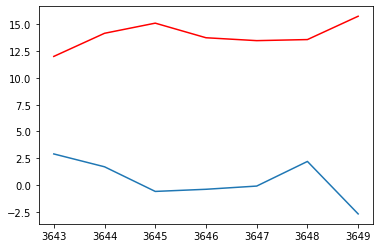

In [269]:
plt.plot(test)
plt.plot(predictions, color='Red')


## ARIMA Model

In [ ]:
#steps
# 1. PLot the graph identify any trends(if linear d=1, if polynomial d>=2)
# 2. Plot the acf plot and findout values (p)
# 3. Plot the pacf plot and findout the lag values (q)

In [273]:
dfd=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\shampoo.csv', parse_dates=[0])

In [274]:
dfd.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


<AxesSubplot:>

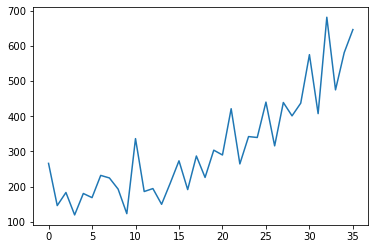

In [276]:
dfd['Sales'].plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

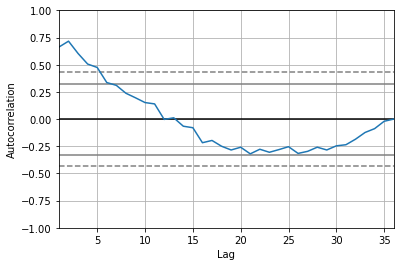

In [277]:
autocorrelation_plot(dfd['Sales'])

In [278]:
#from statsmodels.graphics.tsaplots import plot_pacf

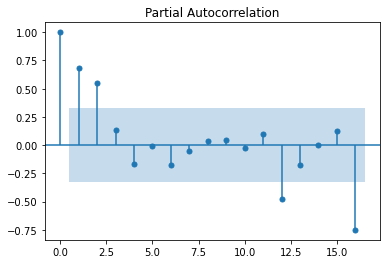

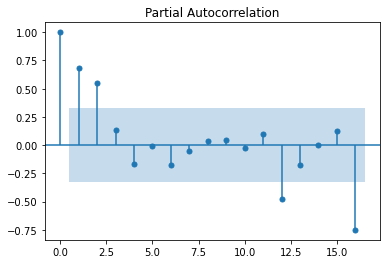

In [280]:
plot_pacf(dfd['Sales'])

In [282]:
#from statsmodels.tsa.arima_model import ARIMA

In [283]:
model=ARIMA(dfd['Sales'], order=(5,2,2))

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [285]:
model_fit=model.fit()

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning

In [286]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -189.034
Method:                       css-mle   S.D. of innovations             54.353
Date:                Mon, 16 Aug 2021   AIC                            396.067
Time:                        13:11:39   BIC                            409.805
Sample:                             2   HQIC                           400.752
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9167      0.256      3.574      0.000       0.414       1.419
ar.L1.D2.Sales    -2.1873      0.184    -11.887      0.000      -2.548      -1.827
ar.L2.D2.Sales    -2.1232      0.405     -5.246      0.000      -2.916      -1.330
ar.L3.D2.Sales    -1.6013      0.478     -3.353      0.001      -2.537      -0.665
ar.L4.D2.Sales    -1.0317      0.409     -2.520      0.012      -1.834      -0.229
ar.L5.D2.Sales    -0.3194      0.193     -1.654      0.098      -0.698       0.059
ma.L1.D2.Sales    -0.0006      0.120     -0.005      0.996      -0.235       0.234
ma.L2.D2.Sales    -0.9994      0.119     -8.365      0.000      -1.234      -0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1410           -1.3030j            1.3106           -0.2329
AR.2            0.1410           +1.3030j            1.3106            0.2329
AR.3           -1.1312           -0.4226j            1.2076           -0.4431
AR.4           -1.1312           +0.4226j            1.2076            0.4431
AR.5           -1.2499           -0.0000j            1.2499           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0006           +0.0000j            1.0006            0.5000
-----------------------------------------------------------------------------
"""

In [288]:
residuals=model_fit.resid

<AxesSubplot:>

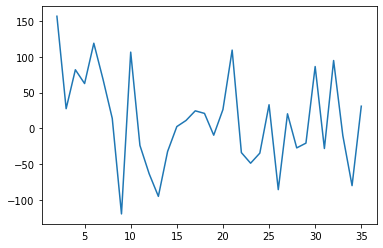

In [289]:
residuals.plot()

In [290]:
#Residuals seems having a white noise therefore model is good

In [291]:
residuals.describe()

count     34.000000
mean      11.294016
std       65.989741
min     -119.294318
25%      -31.205179
50%       12.475625
75%       55.128775
max      156.383338
dtype: float64

In [296]:
output=model_fit.forecast()

In [293]:
output

(array([636.09568039]),
 array([54.35276636]),
 array([[529.56621587, 742.62514491]]))

In [294]:
#This is the forecast value for the next period
#first value- Fiorecast value
#second value- standard deviation
# third value- 95% confidence interval

In [297]:
output1=model_fit.forecast(5)

In [299]:
output1[0]

array([636.09568039, 709.22300758, 664.27201687, 771.13251437,
       761.5365018 ])

### Walk Forward ARIMA

In [300]:
dfd.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [301]:
dfd.shape

(36, 2)

In [302]:
train_size=int(dfd.shape[0]*0.7)

In [303]:
train,test=dfd.Sales[:train_size], dfd.Sales[train_size:]

In [304]:
train.shape

(25,)

In [305]:
test.shape

(11,)

In [308]:
data=train
predict=[]
for t in test:
    model=ARIMA(data, order=(5,1,0))
    modelf=model.fit()
    y_pred=modelf.forecast()
    print(y_pred[0][0])
    predict.append(y_pred[0][0])
    data=np.append(data,t)
    data=pd.Series(data)

387.3764346838824
348.15420814191236
386.308807858191
356.0820476549871
446.37951226135834
394.7372284965589
434.9155712212196
507.92348084062917
435.482911810833
652.743715099047
546.3434979669156


In [309]:
predict

[387.3764346838824,
 348.15420814191236,
 386.308807858191,
 356.0820476549871,
 446.37951226135834,
 394.7372284965589,
 434.9155712212196,
 507.92348084062917,
 435.482911810833,
 652.743715099047,
 546.3434979669156]

In [311]:
mean_squared_error(test,predict)

8119.1239342335675

## SARIMA

In [312]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
miles2=miles_deco=pd.read_csv('C:\\Lachin\\DataSets\\7. ST Academy - Time Series resource files\\us-airlines-monthly-aircraft-miles-flown.csv',parse_dates=[0])

In [33]:
miles2.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [34]:
miles2.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [334]:
miles2.shape

(96, 2)

In [317]:
miles2.index=miles2['Month']

In [319]:
resulta=seasonal_decompose(miles2['MilesMM'],  model='Multiplicative')

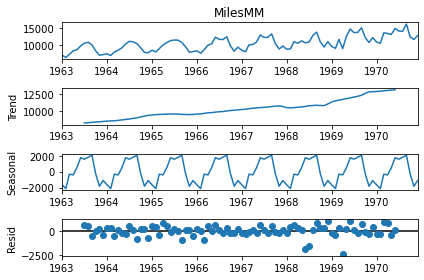

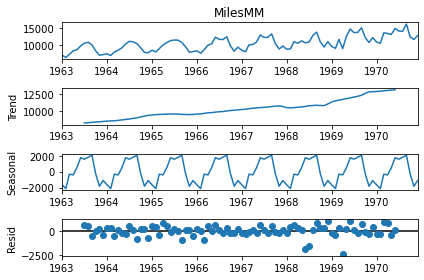

In [320]:
resulta.plot()

In [321]:
model=SARIMAX(miles2['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))
# SARIMA(p,d,q)(P,D,Q)

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [322]:
modelfit2=model.fit()

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [324]:
resi1=modelfit2.resid

In [325]:
resi1

Month
1963-01-01    6827.000000
1963-02-01     306.044796
1963-03-01    1661.910010
1963-04-01    1039.240592
1963-05-01    1394.921284
                 ...     
1970-08-01    -672.455120
1970-09-01     -23.380213
1970-10-01    -732.219465
1970-11-01     916.371186
1970-12-01    -542.041446
Length: 96, dtype: float64

<AxesSubplot:xlabel='Month'>

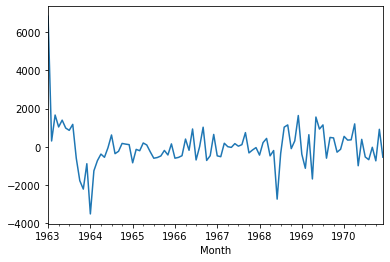

In [326]:
resi1.plot()

In [327]:
#residuals are lying in a white noise series hence the model is good

In [328]:
outout=modelfit2.forecast()

In [329]:
outout

1971-01-01    11475.78587
Freq: MS, dtype: float64

In [331]:
out1=modelfit2.forecast(12)

In [332]:
out1

1971-01-01    11475.785870
1971-02-01    11153.462748
1971-03-01    13669.331392
1971-04-01    12647.160189
1971-05-01    14339.004541
1971-06-01    15786.285448
1971-07-01    14979.079337
1971-08-01    15362.150136
1971-09-01    16962.739056
1971-10-01    13682.101951
1971-11-01    12426.852675
1971-12-01    13730.001412
Freq: MS, Name: predicted_mean, dtype: float64

In [335]:
yhat=modelfit2.predict()

In [336]:
#can give the end and start points
#if not by default, predict for remining data 

In [337]:
out1.shape

(12,)

In [338]:
yhat.shape

(96,)

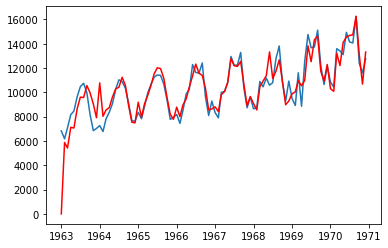

In [340]:
plt.plot(miles2['MilesMM'])
plt.plot(yhat, color='Red')